# What is the Most Optimal Skill to learn for Data Analyst Job Role?

1. Group skill and determine their Median Salary and Likelihood of Being in a Job posting
2. Scatter Plot is used to see Median Salary and Corresponding % of that skill being in job posting
3. Only Top 10 Demanded Skills are considered with their respective Median Salary

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
from adjustText import adjust_text

In [2]:
# Data Loaded and Data Clean Up: DateTime column converted to DateTime DataType and job_skills column skills were string Converted to List

# dataset = load_dataset('lukebarousse/data_jobs')
# df = dataset['train'].to_pandas()
# Give (#) to the df below and and then remove (#) from the above (dataset & df) to review the Data on your device 

df = pd.read_csv('data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df['job_posted_date_month'] = df['job_posted_date'].dt.month

In [30]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy().reset_index(drop=True).dropna(subset=['salary_year_avg'])

In [31]:
df_DA_US_exp = df_DA_US.dropna(subset=['salary_year_avg']).reset_index(drop=True).explode('job_skills')

In [34]:
df_DA_skills = df_DA_US_exp.groupby('job_skills').agg(
    skill_count = ('salary_year_avg', 'count'),\
    median_salary = ('salary_year_avg', 'median')
).sort_values(by='skill_count', ascending=False).head(10)
df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


In [45]:
da_jobs = df_DA_US.groupby('job_title_short').size()
da_jobs

job_title_short
Data Analyst    4350
dtype: int64

In [125]:
tech_category_mapping = {
    'sql': 'DataBases',
    'excel': 'Analyst-Tool',
    'python': 'Programming',
    'tableau': 'Analyst-Tool',
    'sas': 'Programming',
    'r': 'Programming',
    'power bi': 'Analyst-Tool',
    'powerpoint': 'Analyst-Tool',
    'word': 'Analyst-Tool',
    'sql server': 'DataBases'}

In [121]:
df_DA_skills = df_DA_skills.reset_index()

In [128]:
df_DA_skills['tech'] = df_DA_skills['job_skills'].map(tech_category_mapping)
df_DA_skills.set_index('job_skills', inplace=True)
df_DA_skills

,skill_count,median_salary,skill_perc,tech
job_skills,,,,
sql,2508,91000.00,57.655172,DataBases
excel,1808,84392.00,41.563218,Analyst-Tool
python,1431,97500.00,32.896552,Programming
tableau,1364,92875.00,31.356322,Analyst-Tool
sas,926,90000.00,21.287356,Programming
r,893,92500.00,20.528736,Programming
power bi,838,90000.00,19.264368,Analyst-Tool
powerpoint,462,85000.00,10.620690,Analyst-Tool
word,461,81194.75,10.597701,Analyst-Tool


In [129]:
df_DA_skills['skill_perc'] = df_DA_skills['skill_count'].div(4350/100)
df_DA_skills

,skill_count,median_salary,skill_perc,tech
job_skills,,,,
sql,2508,91000.00,57.655172,DataBases
excel,1808,84392.00,41.563218,Analyst-Tool
python,1431,97500.00,32.896552,Programming
tableau,1364,92875.00,31.356322,Analyst-Tool
sas,926,90000.00,21.287356,Programming
r,893,92500.00,20.528736,Programming
power bi,838,90000.00,19.264368,Analyst-Tool
powerpoint,462,85000.00,10.620690,Analyst-Tool
word,461,81194.75,10.597701,Analyst-Tool


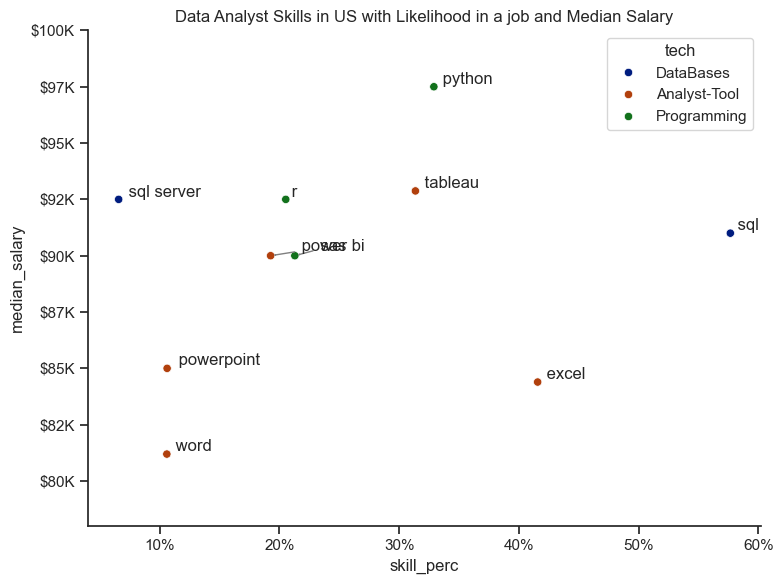

In [135]:
plt.figure(figsize=(8,6))
sns.set_theme(style='ticks')

sns.scatterplot(df_DA_skills, x='skill_perc', y='median_salary', hue='tech', palette='dark')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:.0f}%'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.title('Data Analyst Skills in US with Likelihood in a job and Median Salary', fontsize=12)
plt.ylim(78000,100000)
sns.despine()
text=[]
for i,txt in enumerate(df_DA_skills.index):
    text.append(plt.text(df_DA_skills['skill_perc'].iloc[i], df_DA_skills['median_salary'].iloc[i], " " + txt))
adjust_text(text, arrowprops=dict(arrowstyle='->', color='gray'))

plt.tight_layout()

plt.show()
